# Attribute information:

target: DIE (1), LIVE (2)
age: 10, 20, 30, 40, 50, 60, 70, 80
gender: male (1), female (2)

------ no = 2,   yes = 1 ------

- steroid: no, yes
- antivirals: no, yes
- fatique: no, yes
- malaise: no, yes
- anorexia: no, yes
- liverBig: no, yes
- liverFirm: no, yes
- spleen: no, yes
- spiders: no, yes
- ascites: no, yes
- varices: no, yes
- histology: no, yes
- bilirubin: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00 --
- alk: 33, 80, 120, 160, 200, 250 ---
- sgot: 13, 100, 200, 300, 400, 500, ---
- albu: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0, ---
- protime: 10, 20, 30, 40, 50, 60, 70, 80, 90, ---
- NA's are represented with "?"

# Dataset Reading and Pre-Processing steps
- import required libraries

In [25]:
# importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
df =pd.read_csv("Data\hepatitis.csv", na_values="?")
df.head()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,2,30,2,1.0,2,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,2,50,1,1.0,2,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,3,2,78,1,2.0,2,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,4,2,31,1,NaN,1,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [29]:
print(df.shape,"\n=====================")
print(df.columns,"\n=====================")

(155, 21) 
Index(['ID', 'target', 'age', 'gender', 'steroid', 'antivirals', 'fatigue',
       'malaise', 'anorexia', 'liverBig', 'liverFirm', 'spleen', 'spiders',
       'ascites', 'varices', 'bili', 'alk', 'sgot', 'albu', 'protime',
       'histology'],
      dtype='object') 


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          155 non-null    int64  
 1   target      155 non-null    int64  
 2   age         155 non-null    int64  
 3   gender      155 non-null    int64  
 4   steroid     154 non-null    float64
 5   antivirals  155 non-null    int64  
 6   fatigue     154 non-null    float64
 7   malaise     154 non-null    float64
 8   anorexia    154 non-null    float64
 9   liverBig    145 non-null    float64
 10  liverFirm   144 non-null    float64
 11  spleen      150 non-null    float64
 12  spiders     150 non-null    float64
 13  ascites     150 non-null    float64
 14  varices     150 non-null    float64
 15  bili        149 non-null    float64
 16  alk         126 non-null    float64
 17  sgot        151 non-null    float64
 18  albu        139 non-null    float64
 19  protime     88 non-null     f

In [34]:
df.duplicated().sum()

0

In [31]:
df.isnull().sum()

ID             0
target         0
age            0
gender         0
steroid        1
antivirals     0
fatigue        1
malaise        1
anorexia       1
liverBig      10
liverFirm     11
spleen         5
spiders        5
ascites        5
varices        5
bili           6
alk           29
sgot           4
albu          16
protime       67
histology      0
dtype: int64

<Axes: >

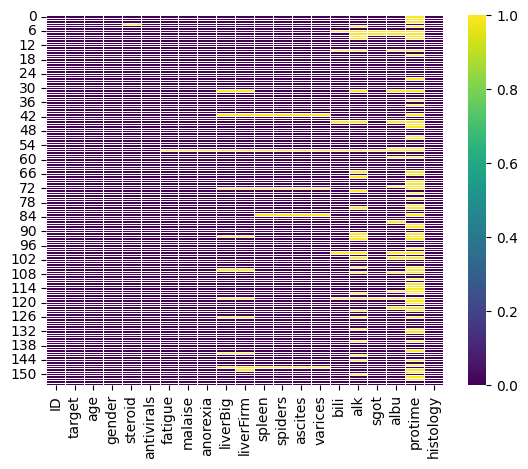

In [32]:
sns.heatmap(df.isnull(), cmap='viridis',linewidths=0.7)

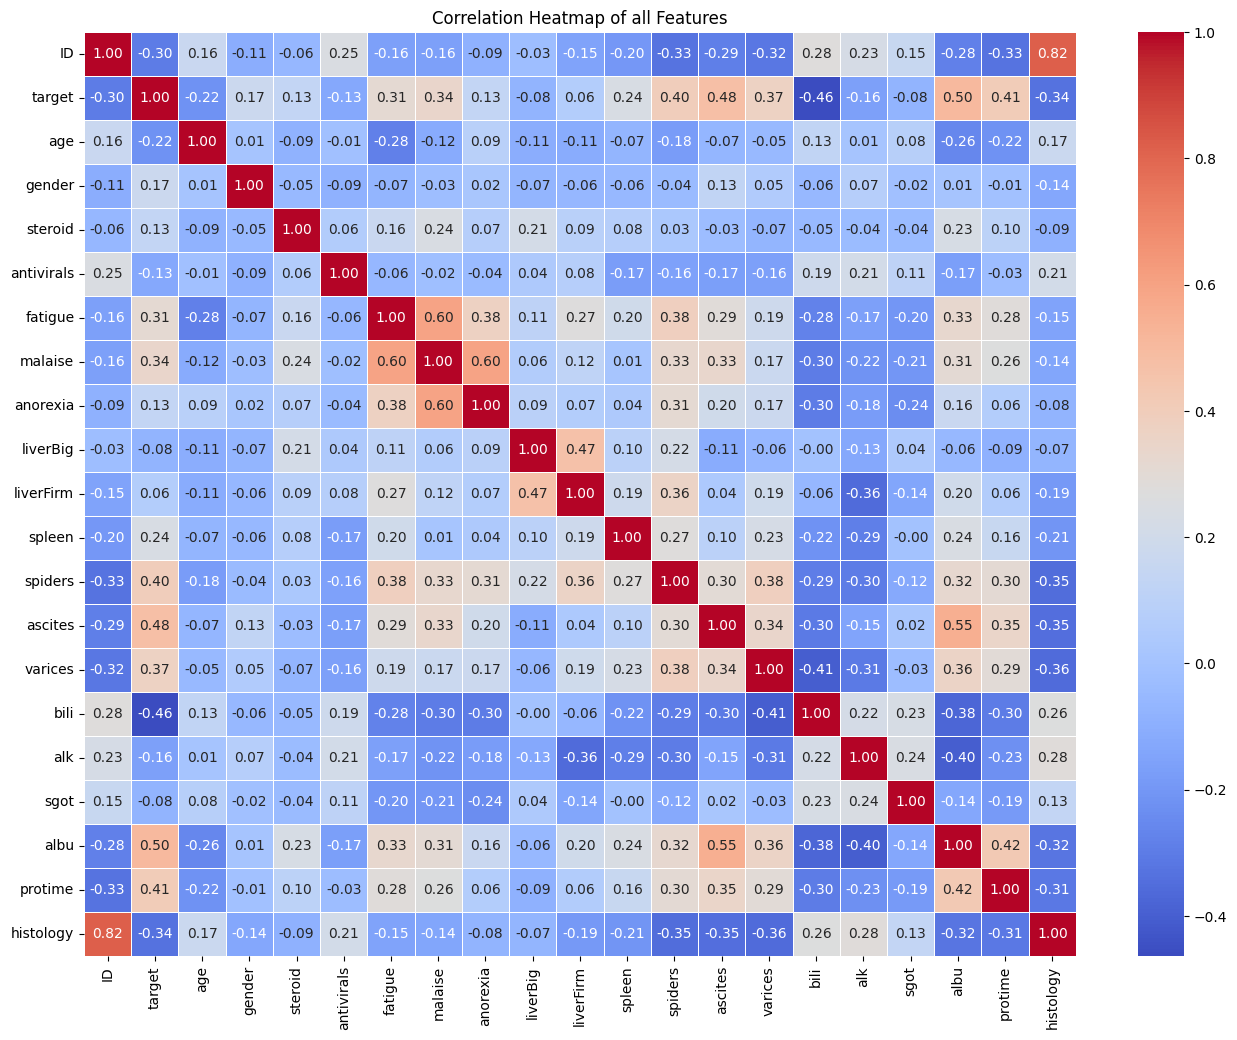

In [33]:
# Heat Map of Corelation

corr_matrix = df.corr()

plt.figure(figsize=(16, 12))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add labels and title
plt.title('Correlation Heatmap of all Features')

# Show the plot
plt.show()

In [35]:
# Dealing with missing values:

df['steroid'].fillna(df['steroid'].mode()[0], inplace=True)
df['fatigue'].fillna(df['fatigue'].mode()[0], inplace=True)
df['malaise'].fillna(df['malaise'].mode()[0], inplace=True)
df['anorexia'].fillna(df['anorexia'].mode()[0], inplace=True)
df['liverBig'].fillna(df['liverBig'].mode()[0], inplace=True)
df['liverFirm'].fillna(df['liverFirm'].mode()[0], inplace=True)
df['spleen'].fillna(df['spleen'].mode()[0], inplace=True)
df['spiders'].fillna(df['spiders'].mode()[0], inplace=True)
df['ascites'].fillna(df['ascites'].mode()[0], inplace=True)
df['varices'].fillna(df['varices'].mode()[0], inplace=True)
df['bili'].fillna(df['bili'].mean(), inplace=True)
df['alk'].fillna(df['alk'].mean(), inplace=True)
df['sgot'].fillna(df['sgot'].mean(), inplace=True)
df['albu'].fillna(df['albu'].mean(), inplace=True)
df['protime'].fillna(df['protime'].mean(), inplace=True)

In [36]:
df.isnull().sum()

ID            0
target        0
age           0
gender        0
steroid       0
antivirals    0
fatigue       0
malaise       0
anorexia      0
liverBig      0
liverFirm     0
spleen        0
spiders       0
ascites       0
varices       0
bili          0
alk           0
sgot          0
albu          0
protime       0
histology     0
dtype: int64

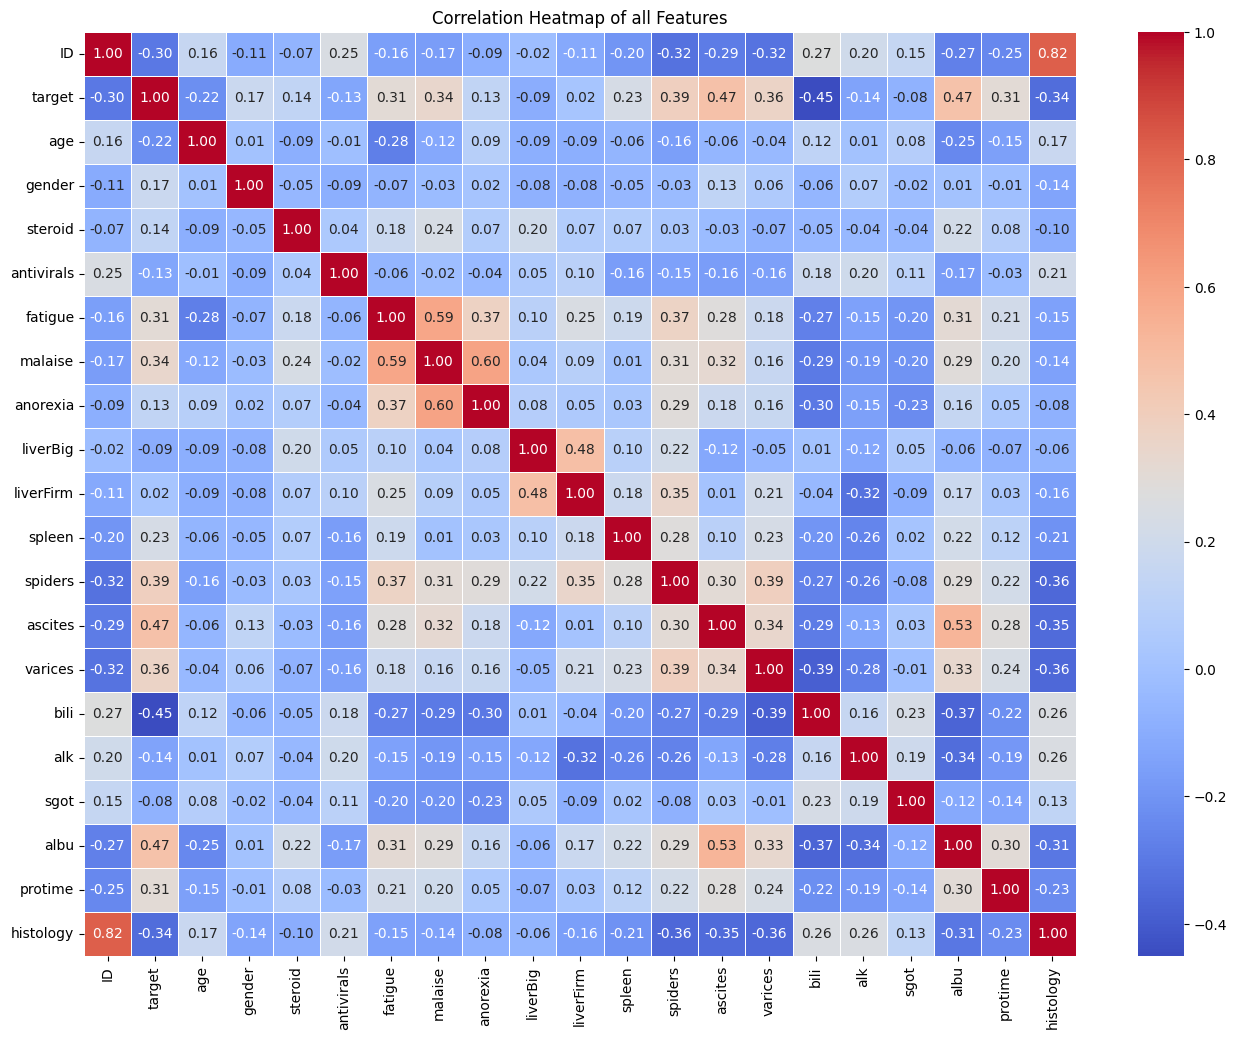

In [37]:
# Heat Map of Corelation after imputing missing values:

corr_matrix = df.corr()

plt.figure(figsize=(16, 12))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add labels and title
plt.title('Correlation Heatmap of all Features')

# Show the plot
plt.show()

In [38]:
df.describe()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,...,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,1.793548,41.200000,1.103226,1.509677,1.845161,1.348387,1.606452,1.793548,1.838710,...,1.806452,1.670968,1.870968,1.883871,1.427517,105.325397,85.894040,3.817266,61.852273,1.451613
std,44.888751,0.406070,12.565878,0.305240,0.501527,0.362923,0.478004,0.490120,0.406070,0.368991,...,0.396360,0.471385,0.336322,0.321418,1.188301,46.405585,88.478932,0.616750,17.193528,0.499266
min,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,39.500000,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,...,2.000000,1.000000,2.000000,2.000000,0.800000,78.000000,32.500000,3.500000,57.000000,1.000000
50%,78.000000,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,102.000000,59.000000,3.900000,61.852273,1.000000
75%,116.500000,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,155.000000,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [39]:
# seprating dependent and independent variables:
X = df.drop(['target','ID'], axis=1)
y = df['target']

In [40]:
# Test Train Splitting:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 19), (31, 19), (124,), (31,))

In [41]:
# Scaling Dataset before fitting model:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree Classifiers" : DecisionTreeClassifier(),
    "Random Forest Classifiers" : RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Evaluating models and then comparing their metrics

model_performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    model_performance[name] = [accuracy, precision, recall, f1]

performance_df = pd.DataFrame(model_performance, index=["Accuracy", "Precision", "Recall", "F1 Score"])
performance_df

,Logistic Regression,Decision Tree Classifiers,Random Forest Classifiers,Support Vector Machine
Accuracy,0.838710,0.612903,0.806452,0.709677
Precision,0.800926,0.497475,0.744048,0.566667
Recall,0.693452,0.497024,0.622024,0.559524
F1 Score,0.723708,0.494565,0.642308,0.562009


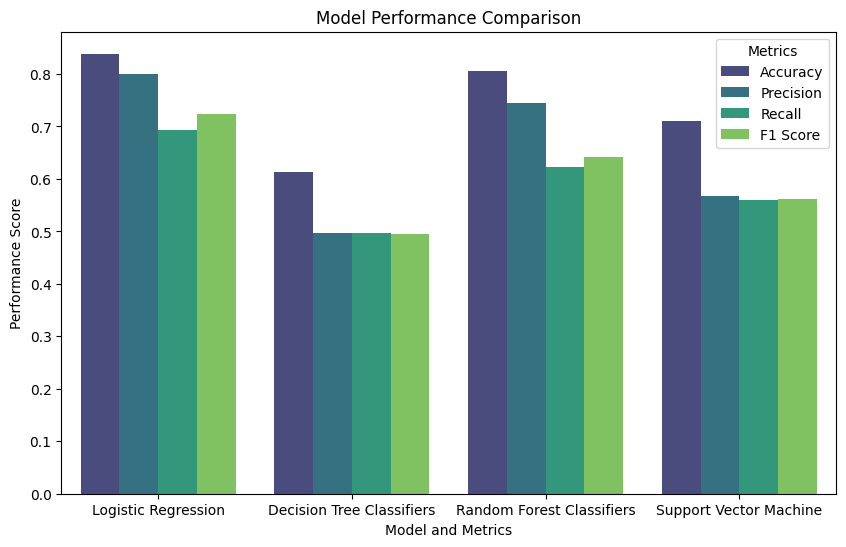

In [43]:
performance_df_long = performance_df.reset_index().melt(id_vars='index', var_name='Model', value_name='Score')

# Now you can plot with 'Model' and 'Metrics' on x-axis and 'Score' on y-axis
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='index', data=performance_df_long, palette='viridis')
plt.title("Model Performance Comparison")
plt.xlabel("Model and Metrics")
plt.ylabel("Performance Score")
plt.legend(title='Metrics')
plt.show()

In [44]:
performance_df_long

,index,Model,Score
0,Accuracy,Logistic Regression,0.838710
1,Precision,Logistic Regression,0.800926
2,Recall,Logistic Regression,0.693452
3,F1 Score,Logistic Regression,0.723708
4,Accuracy,Decision Tree Classifiers,0.612903
5,Precision,Decision Tree Classifiers,0.497475
6,Recall,Decision Tree Classifiers,0.497024
7,F1 Score,Decision Tree Classifiers,0.494565
8,Accuracy,Random Forest Classifiers,0.806452
9,Precision,Random Forest Classifiers,0.744048


In [46]:
import joblib

In [47]:
# Save the model as a pickle file
joblib.dump(models["Logistic Regression"], 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']